# Livro Cap 5

In [1]:
from sympy import *
from sympy.plotting import plot, plot3d

In [2]:
def equacoes(x1, x2):
    return (
        -x1**3-4*x1-x2,
        3*x1
    )

x1, x2 = var('x1 x2', real=True)
alpha = 1e-8

dFdx1, dFdx2 = equacoes(x1, x2)

In [3]:
s = solve([dFdx1, dFdx2], [x1, x2], dict=True)
#s = nonlinsolve([dFdx1, dFdx2], [x1, x2])
#s = nsolve([dFdx1, dFdx2], [x1, x2], (-1, 1))
s

[{x1: 0, x2: 0}]

In [4]:
dFdx1x1 = diff(dFdx1, x1)
dFdx2x2 = diff(dFdx2, x2)
dFdx1x2 = diff(dFdx1, x2)
dFdx2x1 = diff(dFdx2, x1)

H = Matrix([
    [simplify(dFdx1x1), simplify(dFdx1x2)],
    [simplify(dFdx2x1), simplify(dFdx2x2)]
])
print("Hessiana")
H

Hessiana


Matrix([
[-3*x1**2 - 4, -1],
[           3,  0]])

In [5]:
from forma_geral import forma_geral

forma_geral(H, s)

## Solução: {x1: 0, x2: 0}

### Hessiana

Matrix([
[-4, -1],
[ 3,  0]])

### Sistema Linear 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Solução geral: 


* **Multiplicidade**: 1
* **Autovalor:** -3
* **Autovetor**
        

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


* **Multiplicidade**: 1
* **Autovalor:** -1
* **Autovetor**
        

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**General solution to this linear system**

<IPython.core.display.Math object>

In [6]:
solucoes = [
    [float(i[x1]) for i in s],
    [float(i[x2]) for i in s]
]

FIXME SOLUTION CURVES!!


<ipython-input-7-3578568fe039>:18: RuntimeWarning: invalid value encountered in true_divide
  plt.quiver(x1graf, x2graf, f1/normalizador, f2/normalizador, color='#156dbd', angles='xy')
<ipython-input-7-3578568fe039>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


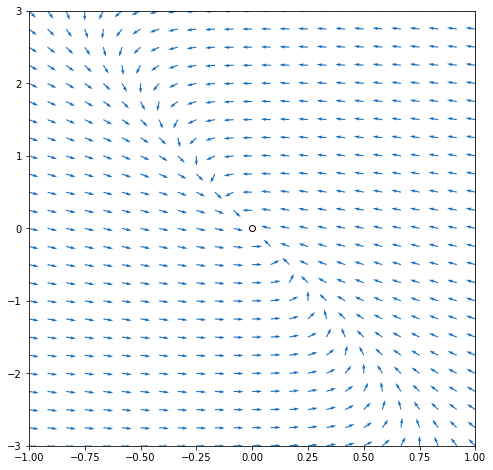

In [7]:
from curvas_de_solucoes import curvas_de_solucoes
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

#set_matplotlib_formats('pdf')
set_matplotlib_formats('png')
plt.rcParams["figure.figsize"] = (8, 8)

fig = plt.figure(num=1)
ax=fig.add_subplot(111)

x1graf, x2graf = np.meshgrid(np.linspace(-1, 1, 25), np.linspace(-3, 3, 25))

#f1, f2 = equacoes(x1graf, x2graf)
f1, f2 = -4*x1graf-x2graf, 3*x1graf
normalizador = np.sqrt(f1**2+f2**2)
plt.quiver(x1graf, x2graf, f1/normalizador, f2/normalizador, color='#156dbd', angles='xy')

print("FIXME SOLUTION CURVES!!")

plt.scatter(solucoes[0], solucoes[1], marker='o', edgecolors='black', color='w')

ax = plt.axes()
ax.set_xlim([-1, 1])
ax.set_ylim([-3, 3])

plt.show()